<a href="https://colab.research.google.com/github/YCCS-Summer-2023-DDNMA/project/blob/main/ramesh_natarajan/plotting_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be using the matplotlib package quite a bit, so you need to be familiar with basic x-y plots, x-Y plots, subplots, histograms, density plots, 2-d shaded plots etc. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Here is a basic x-y plot with labels and title

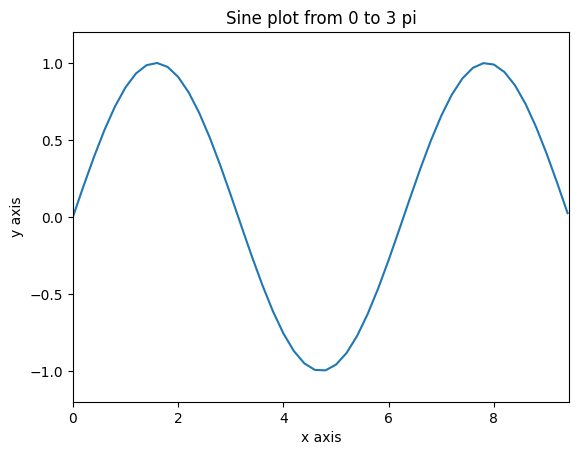

In [2]:
# Compute the x and y coordinates for points on a sine curve from 0 to 3*pi

x = np.arange(0, 3 * np.pi, 0.2)
y = np.sin(x)

# plot x and y

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('Sine plot from 0 to 3 pi')
ax.set_xlim([0, 3*np.pi])
ax.set_ylim([-1.2, +1.2])

plt.show()


Here is a x-Y plot with multiple y.  The plot has legends, and uses different markers, linestyles and colors for each of the y plots.  The size of the plot is specified using figsize. 

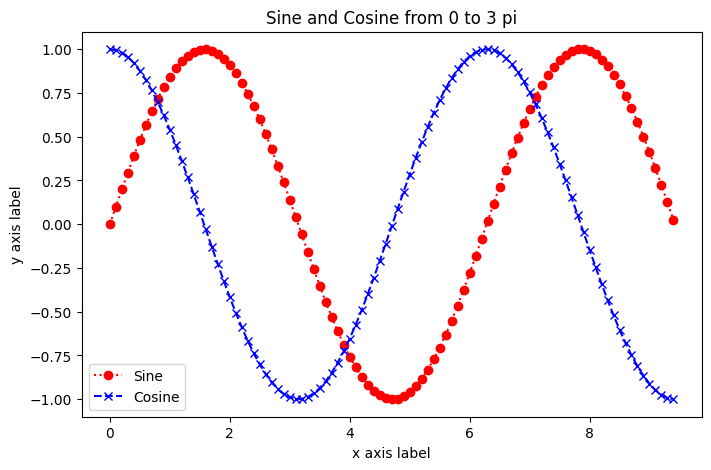

In [14]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(x, y_sin, marker='o', linestyle='dotted', color='red')
ax.plot(x, y_cos, marker='x', linestyle='dashed', color='blue')
ax.set_xlabel('x axis label')
ax.set_ylabel('y axis label')
ax.set_title('Sine and Cosine from 0 to 3 pi')
ax.legend(['Sine', 'Cosine'])

plt.show()

You can also plot multiple x-y subplots in different ways: horizontally stacked, vertically stacked, or stacked both ways in a 2-d grid  


*   The subplot grid is an nrow $\times$ ncol array 
*   If nrow = 1 the plots are horizontally stacked
*   If ncol = 1 the plots are vertically stacked
*   If nrow = ncol = 1 there is only a single subplot
*   It squeeze is False, the axs object is a 2-D array with dimensions (nrow, ncol)
*   If squeeze is True, the axs object is a 1-D array dimensions (nrow) if ncol = 1, dimensions (ncol) if nrow = 1, and is a scalar if nrow = ncol = 1.
*   If sharex = True the x-axis is common to all subplots 
*   Individual subplots can be customized using the set methods on the individual elements of the axs object returned by plt.subplots
*   The layout parameter is used to adjust the positioning and padding space of the subplots to avoid overlapping axes etc. - you can play around with the available options or very rarely define your own layout engine [specification](https://matplotlib.org/stable/api/layout_engine_api.html#matplotlib.layout_engine.LayoutEngine)





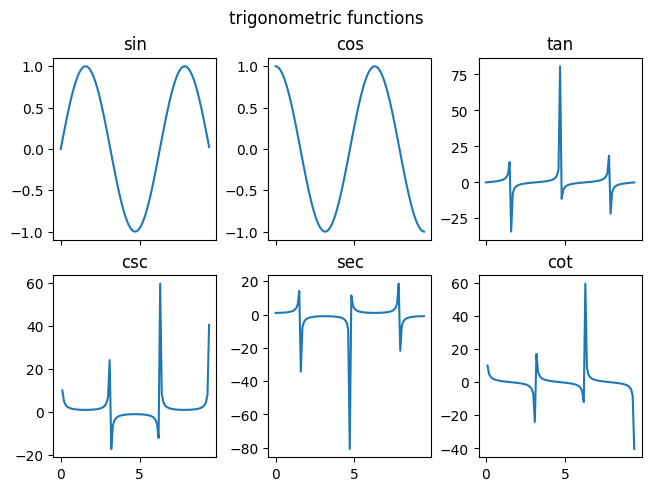

In [5]:
# Compute the x and y coordinates for points on sin, cos, tan, sec, cosec and cot

np.seterr(all='ignore') # ignore divide by zero below

x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x)
y_csc = 1.0/np.sin(x)
y_sec = 1.0/np.cos(x)
y_cot = 1.0/np.tan(x)

np.seterr(all=None) # reset defaults

# Set up a subplot grid in the form of a 2 times 3 array

nrows = 2
ncols = 3

fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = False, squeeze = True, layout = 'constrained')

axs[0, 0].plot(x, y_sin)
axs[0, 0].set_title('sin')

axs[0, 1].plot(x, y_cos)
axs[0, 1].set_title('cos')

axs[0, 2].plot(x, y_tan)
axs[0, 2].set_title('tan')

axs[1, 0].plot(x, y_csc)
axs[1, 0].set_title('csc')

axs[1, 1].plot(x, y_sec)
axs[1, 1].set_title('sec')

axs[1, 2].plot(x, y_cot)
axs[1, 2].set_title('cot')

fig.suptitle("trigonometric functions")

# Show the figure.
plt.show()
plt.close()


Now to plotting probability distributions in Jax.  We will be interested in several kinds of plots, namely probability density functions (pdf), cumulative density functions (cdf), quantile functions (qf) and sample densities/histograms. 

As of now I haven't found a way for distrax distributions to return the quantile function (tfp distributions does so, so either this is a feature gap or I haven't read the distrax documentation closely enough)

We need to know the range of values that the distribution will take, e.g. for unit Normal distribution it is $(-\infty, +\infty)$, for gamma distribution it is $(0, \infty)$ etc.

In [5]:
%%capture
!pip install distrax

normal distribution with mu = 0, sigma = 1
sample size: 1000
sample mean: 0.003301121760159731
sample var: 0.9441421031951904
sample neg log prob: 1.3910150527954102
sample quantiles (x,q): [(0.01, -2.17368483543396), (0.05, -1.6280878782272339), (0.0, -3.0189409255981445), (0.95, 1.5514873266220093), (0.99, 2.1593165397644043)]


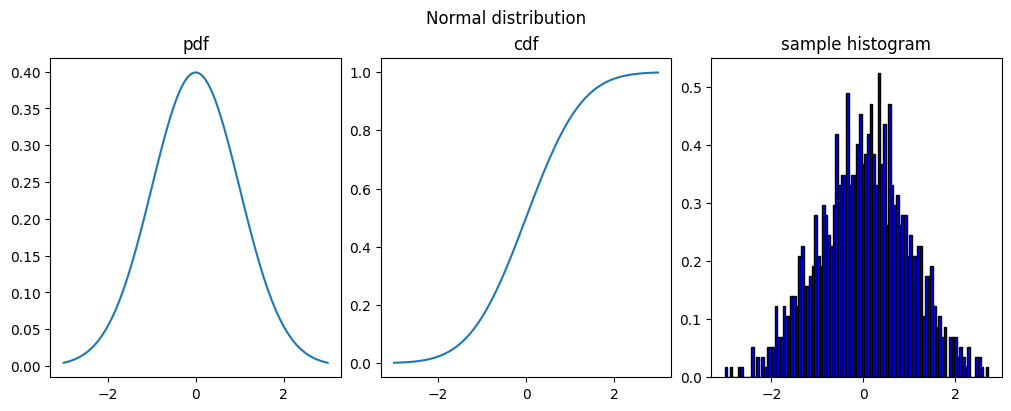

In [18]:
import jax
import jax.numpy as jnp
import distrax

import seaborn as sns

# initialize prng

key = jax.random.PRNGKey(1234)

# pick some continuous distribution 

print('normal distribution with mu = 0, sigma = 1')

mu = 0.0
sigma = 1.0

dist = distrax.Normal(mu, sigma)

# generate all the interesting plots (values should be in the range of the distribution)

values = jnp.linspace(start = -3.0, stop = 3.0, num = 100)

quantiles = jnp.linspace(start = 0.0, stop = 1.0, num = 50)

pdf = dist.prob(values)
cdf = dist.cdf(values)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10,4), sharex = False, sharey = False, squeeze = True, 
                        layout = 'constrained')


axs[0].plot(values, pdf)
axs[0].set_title("pdf")

axs[1].plot(values, cdf)
axs[1].set_title("cdf")

# generate samples of size sample_sz from the distribution

sample_sz = 1000
samples = dist.sample(seed=key, sample_shape = sample_sz)

# print sample statistics
print(f"sample size: {jnp.shape(samples)[0]}")
print(f"sample mean: {jnp.mean(samples)}")
print(f"sample var: {jnp.var(samples)}")
print(f"sample neg log prob: {-jnp.mean(dist.log_prob(samples))}")
print(f"sample quantiles (x,q): {[(x, jnp.quantile(samples, x, axis=None).item()) for x in [0.01, 0.05, 0.0, 0.95, 0.99]]}")


# matplotlib histogram
axs[2].hist(samples, color = 'blue', density = True, edgecolor = 'black', bins = 100)
axs[2].set_title("sample histogram")

fig.suptitle("Normal distribution")
plt.show()